In [4]:
#https://www.kaggle.com/datasets/guillermoezquer/fakenews-espaol?resource=download

import pandas as pd

Data = pd.read_csv('biblia_almeida_completa.csv')
Data.head()

,cod,livro,capitulo,versiculo,texto,tempo,periodo,localizacao,testamento,autor,tipo_livro
0,1,Genesis,1,1,No princípio criou Deus os céus e a terra.,-500,Persian,Israel,antigo,Moises,Torá
1,1,Genesis,1,2,E a terra era sem forma e vazia,-500,Persian,Israel,antigo,Moises,Torá
2,1,Genesis,1,3,E disse Deus: Haja luz,-500,Persian,Israel,antigo,Moises,Torá
3,1,Genesis,1,4,E viu Deus que era boa a luz,-500,Persian,Israel,antigo,Moises,Torá
4,1,Genesis,1,5,E Deus chamou à luz Dia,-500,Persian,Israel,antigo,Moises,Torá


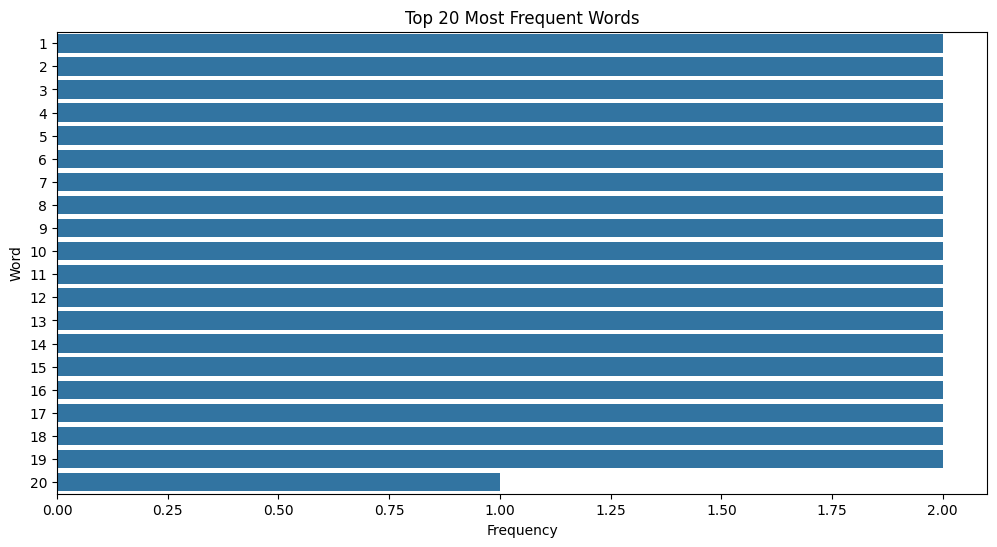

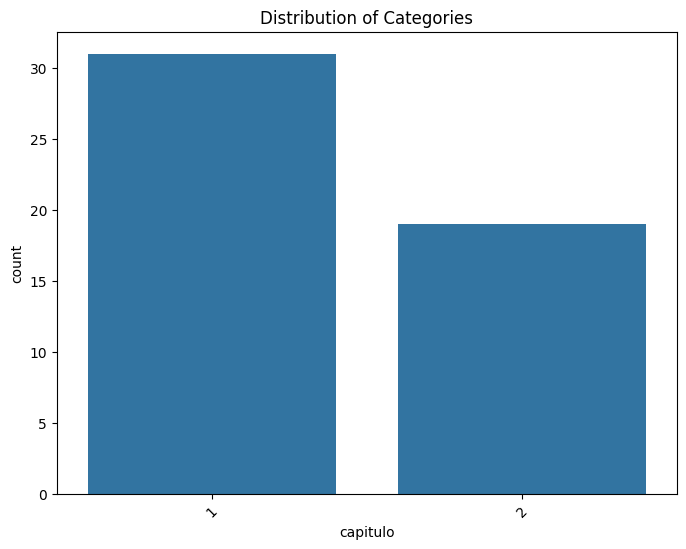

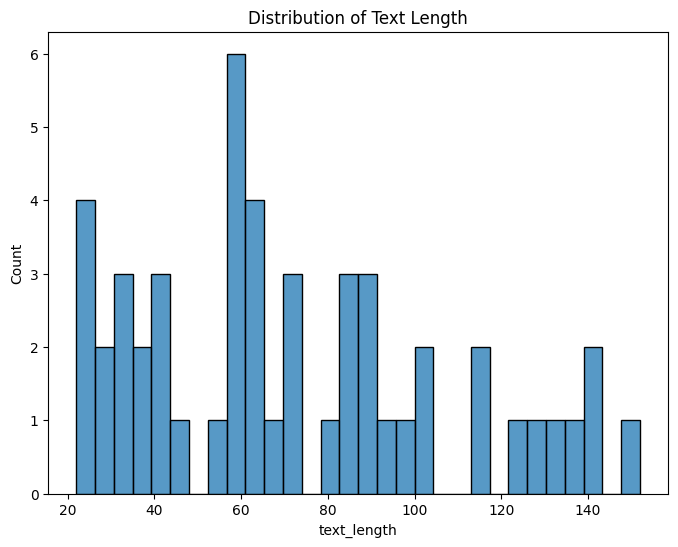

In [21]:
#https://www.kaggle.com/datasets/guillermoezquer/fakenews-espaol?resource=download

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Convert the 'versiculo' column to strings before joining
word_counts = Counter(" ".join(Data['versiculo'].astype(str)).split())
common_words = word_counts.most_common(20)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_common_words)
plt.title('Top 20 Most Frequent Words')
plt.show()

# Category distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='capitulo', data=Data)
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

# Text length distribution
Data['text_length'] = Data['texto'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(Data['text_length'], bins=30)
plt.title('Distribution of Text Length')
plt.show()

In [24]:
#https://www.kaggle.com/datasets/guillermoezquer/fakenews-espaol?resource=download

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


X = Data['texto']
y = Data['capitulo']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjust labels to start from 0 for sparse_categorical_crossentropy
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train_adjusted) # Use adjusted labels

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_adjusted, y_pred)) # Use adjusted labels
print(classification_report(y_test_adjusted, y_pred))



# Neural network with 10 additional layers
vocab_size = len(vectorizer.vocabulary_)
max_length = X_train_vec.shape[1]

model_nn = Sequential()
model_nn.add(Embedding(vocab_size, 128, input_length=max_length))
model_nn.add(LSTM(128))
for _ in range(10):
    model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(len(np.unique(y_train_adjusted)), activation='softmax')) # Use adjusted labels to determine number of classes

model_nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(X_train_vec, y_train_adjusted, epochs=10, batch_size=32, validation_data=(X_test_vec, y_test_adjusted)) # Use adjusted labels

# Evaluate the neural network model
_, accuracy = model_nn.evaluate(X_test_vec, y_test_adjusted) # Use adjusted labels
print("Neural Network Accuracy:", accuracy)


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.25      0.40         4

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 58s 788ms/step - accuracy: 0.6042 - loss: 0.6925 - val_accuracy: 0.6000 - val_loss: 0.6904
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.6250 - loss: 0.6893 - val_accuracy: 0.6000 - val_loss: 0.6866
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.6146 - loss: 0.6847 - val_accuracy: 0.6000 - val_loss: 0.6816
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.6667 - loss: 0.6753 - val_accuracy: 0.6000 - val_loss: 0.6788
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.6250 - loss: 0.6742 - val_accuracy: 0.6000 - val_loss: 0.6786
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.6146 - loss: 0.6756 - val_accuracy: 0.6000 - val_loss: 0.6772
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.6354 - loss: 0.6697 - val_accuracy: 0.6000 - val_loss: 0.6754
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.6250 - loss: 0.6686 - val_accuracy: 0.6000 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


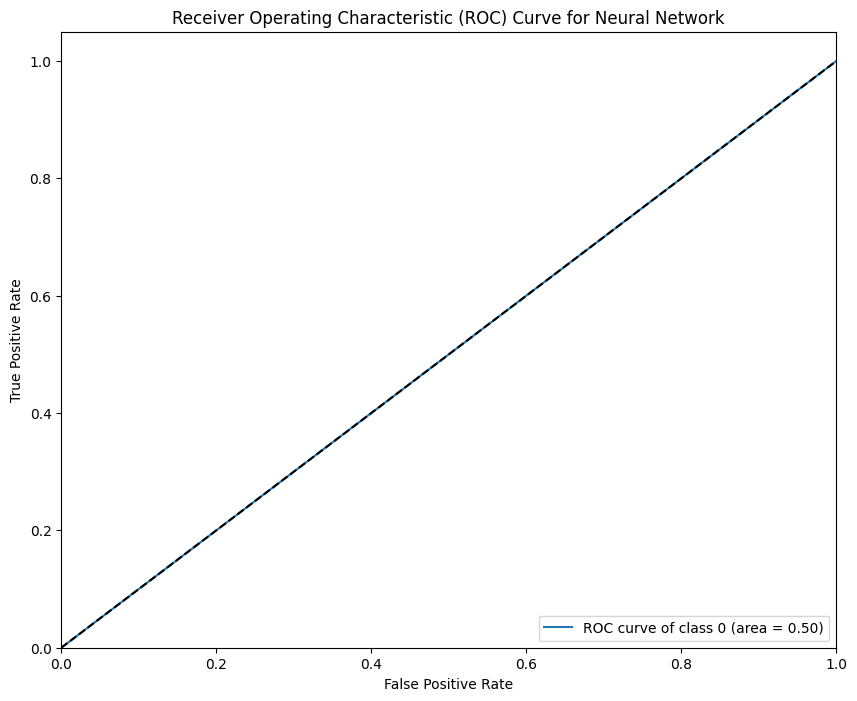

Micro-average AUC: 0.5


In [26]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test_adjusted, classes=np.unique(y_test_adjusted))
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_pred_proba_nn = model_nn.predict(X_test_vec)

# Reshape predicted probabilities to match the number of test samples
y_pred_proba_nn = y_pred_proba_nn[:, 0] # Assuming binary classification, take probabilities for class 0

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_nn) # Use reshaped probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_nn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Print micro-average AUC
print("Micro-average AUC:", roc_auc["micro"])